# Data collection and analysis
**Group 4** \
Adam Zakaria Ababneh \
Kate Paparsenou \
Chris Umbel

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Data Load

In [69]:
df = pd.read_csv('data/ecommerce_customer_data.csv')
df

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems
0,NaN,2020-05-10,25.0,NaN,NaN,Other,Tokyo,4.0,15.886509,NaN,...,0.379694,High,0.0,6.240881,0.112955,0.239948,0.156776,Yes,Yes,No
1,CUST00002,2021-07-18,NaN,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,...,0.140988,Low,0.0,7.721917,0.300979,0.230821,0.290735,Yes,No,No
2,CUST00003,2021-02-04,43.0,NaN,High,France,NaN,10.0,161.739425,1810.555150,...,0.323660,Low,0.0,7.899042,NaN,0.132239,0.050505,Yes,No,Yes
3,CUST00004,2020-12-31,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,...,0.268428,Never,1.0,7.829459,0.074097,0.206644,0.281067,Yes,Yes,No
4,CUST00005,2022-06-27,29.0,Female,Very High,Australia,Tokyo,7.0,31147.427206,2112.575945,...,0.160427,High,NaN,7.777353,0.163438,0.232410,0.326645,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST09996,2018-09-29,39.0,Female,High,Japan,New York,4.0,60.986389,212.992614,...,0.128575,High,1.0,6.094181,0.240422,0.293145,NaN,Yes,Yes,Yes
9996,CUST09997,2020-10-25,58.0,Prefer not to say,Low,France,Sydney,6.0,75.208556,549.352094,...,0.298521,Never,NaN,8.610345,0.056814,0.128591,0.070305,Yes,No,Yes
9997,CUST09998,2023-04-07,14.0,Other,Very High,USA,New York,1.0,37.196899,117.203509,...,0.126018,NaN,0.0,9.864245,0.355694,0.101445,0.161469,No,No,Yes
9998,CUST09999,2021-05-27,29.0,Other,High,Canada,Berlin,3.0,13.191952,-6.655247,...,0.600112,NaN,0.0,6.163032,0.222856,0.160716,0.431023,Yes,No,No


## Conversion
A few fields look like integers, validate that's the case

In [70]:
pd.set_option('display.max_rows', None)
int_columns = ['TotalPurchases', 'CustomerServiceInteractions', 'Age']

In [71]:
list(map(lambda x: print(df[x].value_counts(dropna=False), end='\n\n'), int_columns))

TotalPurchases
4.0     1288
3.0     1264
5.0     1191
2.0     1097
6.0      962
7.0      753
1.0      748
8.0      546
NaN      530
9.0      445
10.0     291
0.0      289
11.0     211
12.0     140
13.0      89
14.0      49
15.0      45
16.0      23
17.0      18
18.0       8
20.0       5
19.0       4
22.0       2
23.0       1
27.0       1
Name: count, dtype: int64

CustomerServiceInteractions
1.0     2634
2.0     2537
3.0     1652
0.0     1261
4.0      897
NaN      518
5.0      350
6.0       97
7.0       41
8.0        9
9.0        3
11.0       1
Name: count, dtype: int64

Age
 NaN     515
 34.0    263
 35.0    262
 36.0    260
 38.0    245
 37.0    244
 40.0    244
 39.0    242
 32.0    241
 31.0    238
 30.0    238
 29.0    236
 33.0    234
 28.0    232
 42.0    218
 24.0    218
 41.0    218
 46.0    216
 27.0    209
 44.0    204
 43.0    204
 47.0    202
 26.0    201
 45.0    197
 23.0    180
 25.0    177
 48.0    165
 20.0    163
 49.0    163
 21.0    160
 22.0    156
 52.0    155
 1

[None, None, None]

Convert the integer fields

In [72]:
df['Age'] = df['Age'].astype('Int64')
df['TotalPurchases'] = df['TotalPurchases'].astype('Int64')
df['CustomerServiceInteractions'] = df['CustomerServiceInteractions'].astype('Int64')

## Column metadata

In [73]:
df.dtypes

CustomerID                      object
RegistrationDate                object
Age                              Int64
Gender                          object
IncomeLevel                     object
Country                         object
City                            object
TotalPurchases                   Int64
AverageOrderValue              float64
CustomerLifetimeValue          float64
FavoriteCategory                object
SecondFavoriteCategory          object
EmailEngagementRate            float64
SocialMediaEngagementRate      float64
MobileAppUsage                  object
CustomerServiceInteractions      Int64
AverageSatisfactionScore       float64
EmailConversionRate            float64
SocialMediaConversionRate      float64
SearchEngineConversionRate     float64
RepeatCustomer                  object
PremiumMember                   object
HasReturnedItems                object
dtype: object

In [74]:
categorical_columns = df.select_dtypes(include = 'object').columns
quantitative_columns = df.select_dtypes(include = ['float64', 'Int64']).columns

### Categorical columns

In [75]:
list(categorical_columns)

['CustomerID',
 'RegistrationDate',
 'Gender',
 'IncomeLevel',
 'Country',
 'City',
 'FavoriteCategory',
 'SecondFavoriteCategory',
 'MobileAppUsage',
 'RepeatCustomer',
 'PremiumMember',
 'HasReturnedItems']

### Quantitative columns

In [76]:
list(quantitative_columns)

['Age',
 'TotalPurchases',
 'AverageOrderValue',
 'CustomerLifetimeValue',
 'EmailEngagementRate',
 'SocialMediaEngagementRate',
 'CustomerServiceInteractions',
 'AverageSatisfactionScore',
 'EmailConversionRate',
 'SocialMediaConversionRate',
 'SearchEngineConversionRate']

## Distribution for categorical fields

In [77]:
pd.set_option('display.max_rows', 20)
list(map(lambda x: print(df.reset_index()[x].value_counts(dropna = False), end='\n\n'), categorical_columns))

CustomerID
NaN          492
CUST06670      1
CUST06672      1
CUST06673      1
CUST06674      1
            ... 
CUST03349      1
CUST03350      1
CUST03351      1
CUST03352      1
CUST10000      1
Name: count, Length: 9509, dtype: int64

RegistrationDate
NaN           496
2018-01-19     14
2019-10-24     13
2019-01-22     13
2020-07-09     12
             ... 
2021-12-24      1
2022-04-12      1
2020-09-26      1
2022-01-16      1
2019-04-11      1
Name: count, Length: 2160, dtype: int64

Gender
NaN                  2612
Other                1901
Female               1846
Male                 1830
Prefer not to say    1807
M                       3
F                       1
Name: count, dtype: int64

IncomeLevel
NaN          2503
Very High    1964
Medium       1918
Low          1821
High         1792
L               1
H               1
Name: count, dtype: int64

Country
France       1227
Japan        1220
USA          1200
Australia    1194
UK           1177
Other        1171
Canada  

[None, None, None, None, None, None, None, None, None, None, None, None]

## Basic statistics of quantitative fields

In [78]:
df.describe()

,Age,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate
count,9485.0,9470.0,9481.000000,9507.000000,9524.000000,9472.000000,9482.0,9504.000000,9477.000000,9506.000000,9495.000000
mean,34.536742,5.044773,189.224562,672.919948,0.282649,0.286632,2.001793,6.955430,0.198026,0.198721,0.199427
std,15.117146,3.205844,1472.277418,5729.439186,0.157996,0.159938,1.422949,1.894267,0.120243,0.119426,0.120992
min,-25.0,0.0,1.235282,-9331.077011,0.002205,0.002378,0.0,0.000000,0.000885,0.001554,0.002951
25%,24.0,3.0,27.441273,95.662915,0.160170,0.161669,1.0,5.670156,0.106547,0.106324,0.106656
50%,35.0,5.0,54.532801,248.018238,0.260164,0.266130,2.0,7.008513,0.176639,0.178118,0.177495
75%,45.0,7.0,109.260008,545.787253,0.384726,0.389884,3.0,8.365637,0.268938,0.271487,0.273069
max,91.0,27.0,51810.123750,420810.815641,0.890822,0.847513,11.0,10.000000,0.783003,0.824266,0.784076


## Number of NULL columns for quantitative fields

In [79]:
df[quantitative_columns].isna().sum()

Age                            515
TotalPurchases                 530
AverageOrderValue              519
CustomerLifetimeValue          493
EmailEngagementRate            476
SocialMediaEngagementRate      528
CustomerServiceInteractions    518
AverageSatisfactionScore       496
EmailConversionRate            523
SocialMediaConversionRate      494
SearchEngineConversionRate     505
dtype: int64

## Bar charts to understand distribution

In [145]:
def draw_barchart(df, column_name):
    print(column_name)
    category_counts = df.value_counts(column_name, dropna = False)
    plt.bar(category_counts.index.astype(str), category_counts.values)
    plt.xticks(rotation = 60, fontsize = 14)
    plt.grid(axis = 'y')
    plt.show()

Gender


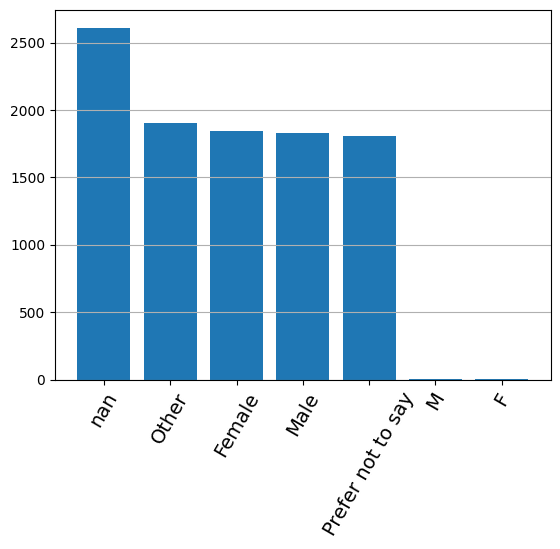

IncomeLevel


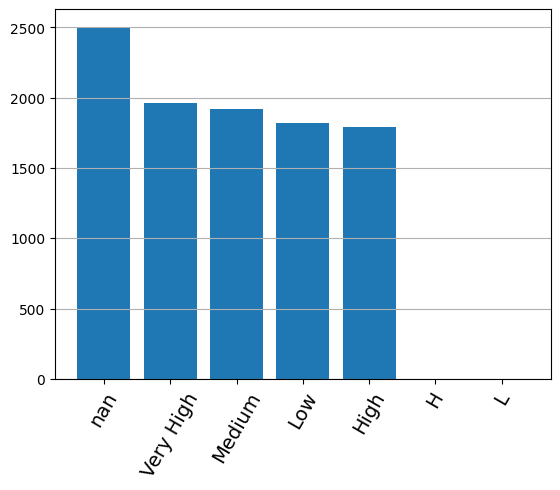

Country


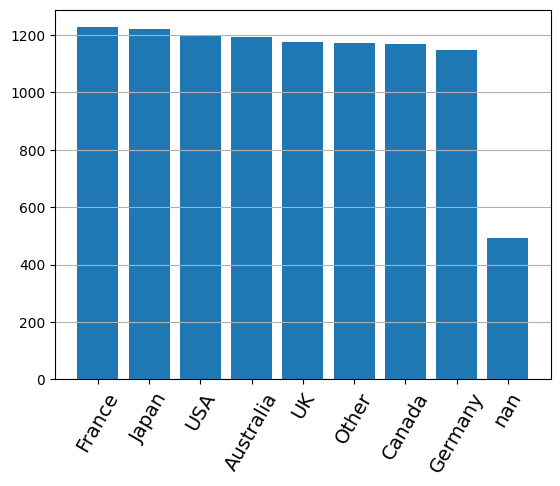

City


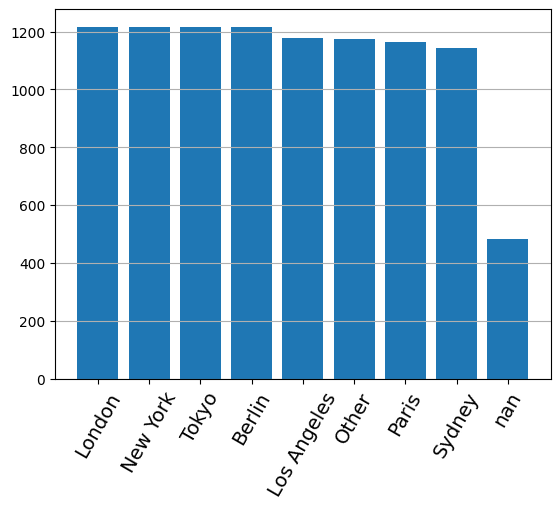

FavoriteCategory


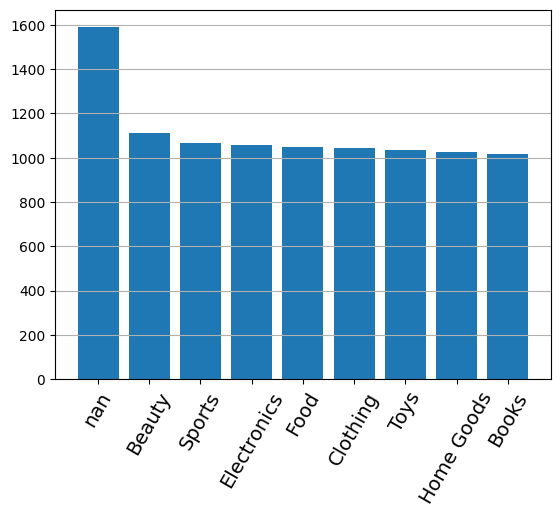

SecondFavoriteCategory


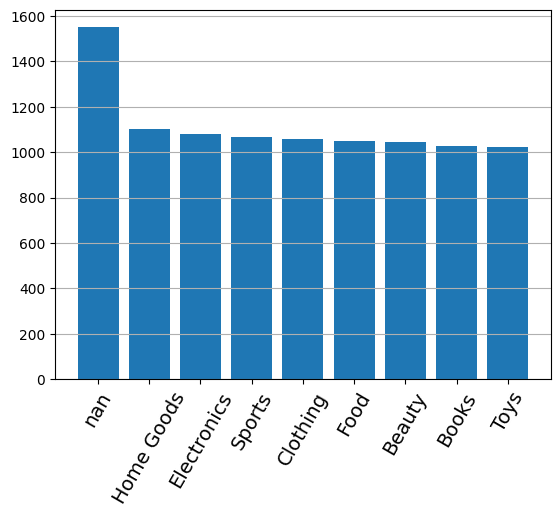

MobileAppUsage


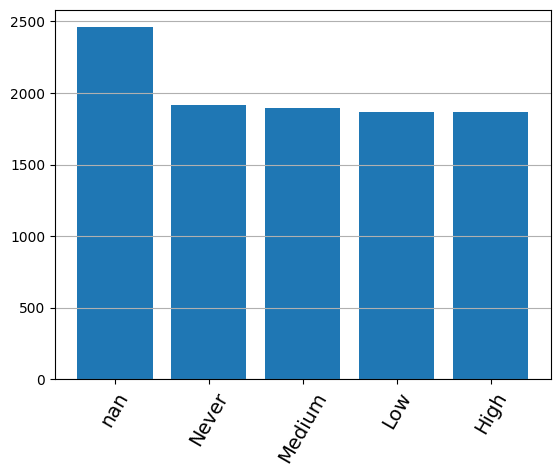

RepeatCustomer


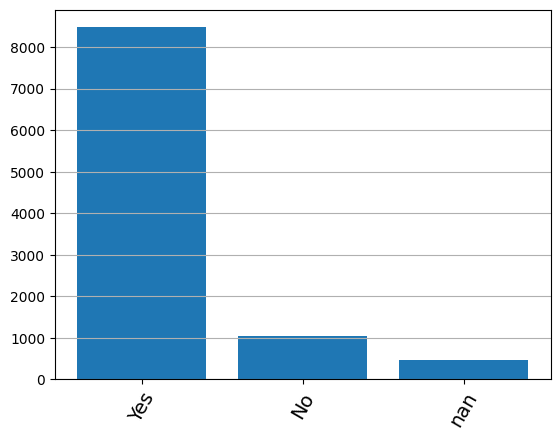

PremiumMember


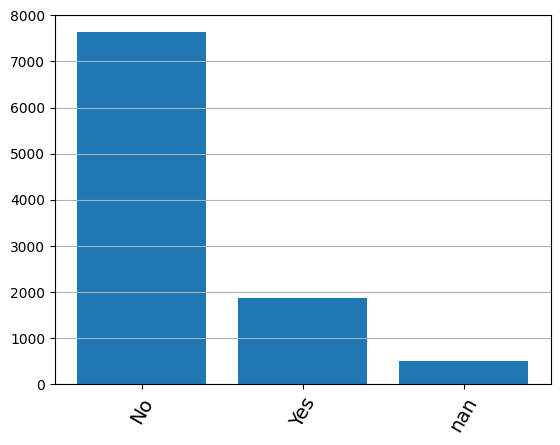

HasReturnedItems


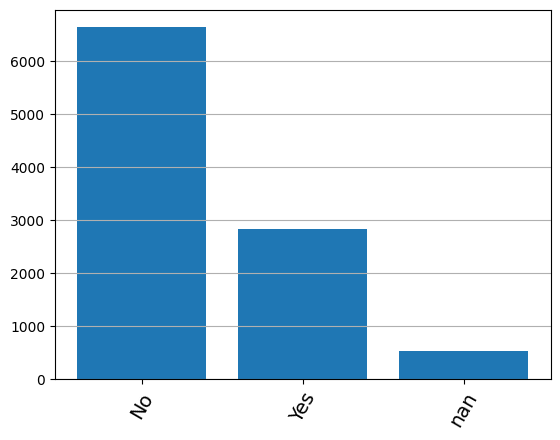

[None, None, None, None, None, None, None, None, None, None]

In [146]:
list(map(lambda x: draw_barchart(df, x), [x for x in list(categorical_columns) if x not in ['CustomerID', 'RegistrationDate']]))

## Histograms to understand distribution

In [82]:
def draw_hist(df, column_name):
    print(column_name)
    plt.hist(df[column_name], bins = 100)
    plt.xticks(rotation = 90)
    plt.grid(axis = 'y')
    plt.show()

Age


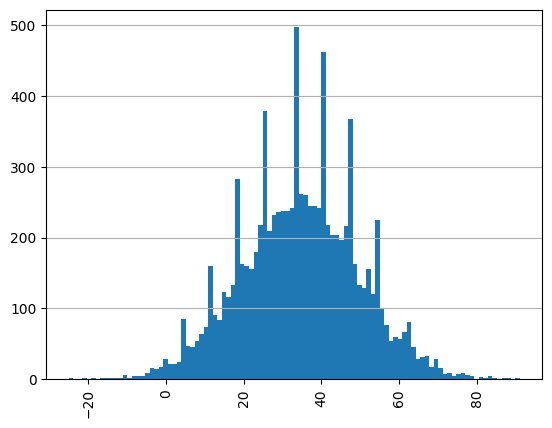

TotalPurchases


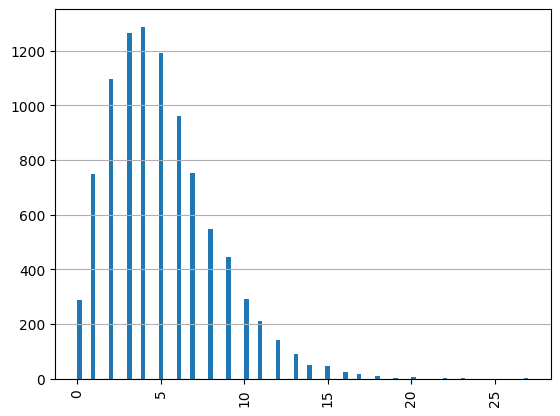

AverageOrderValue


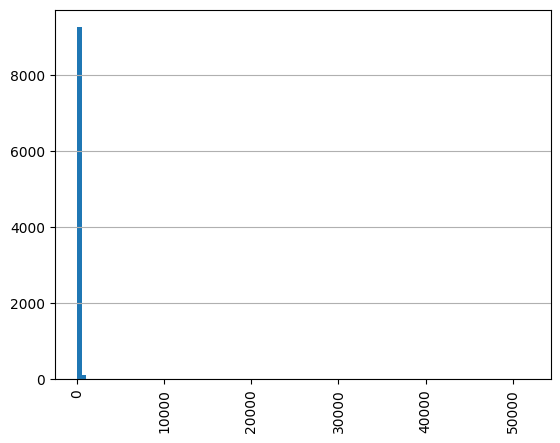

CustomerLifetimeValue


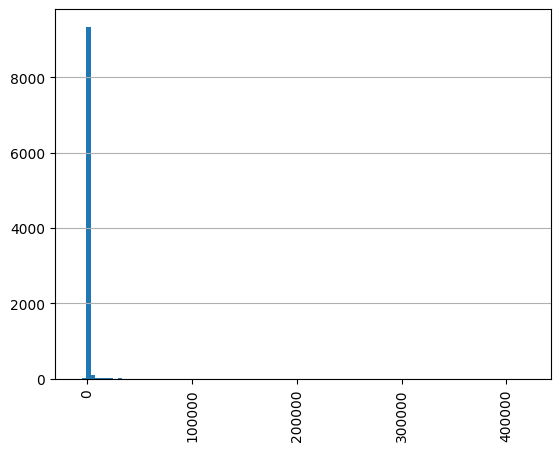

EmailEngagementRate


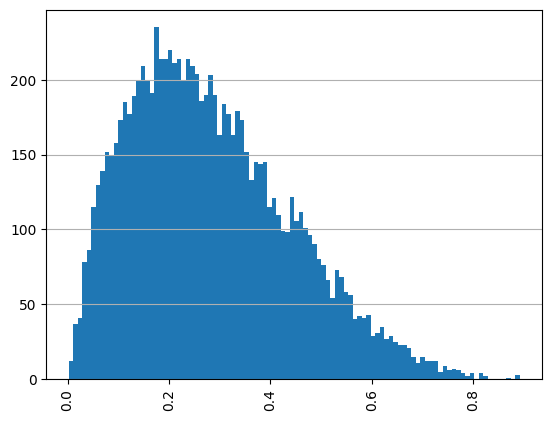

SocialMediaEngagementRate


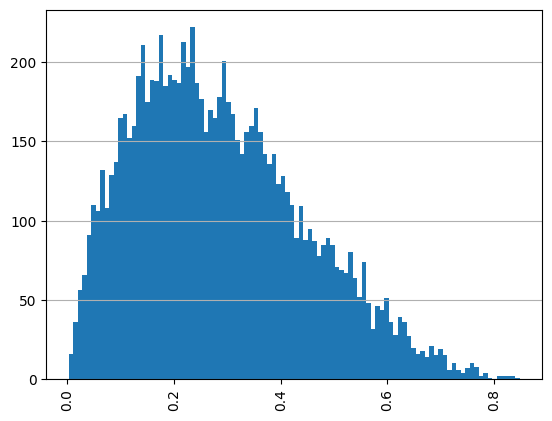

CustomerServiceInteractions


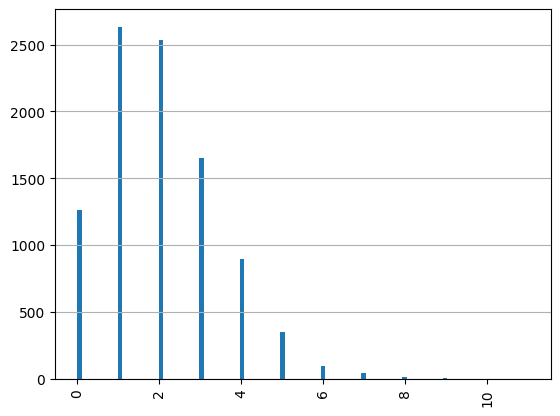

AverageSatisfactionScore


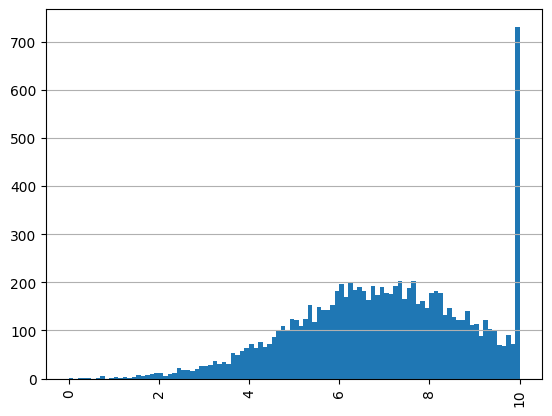

EmailConversionRate


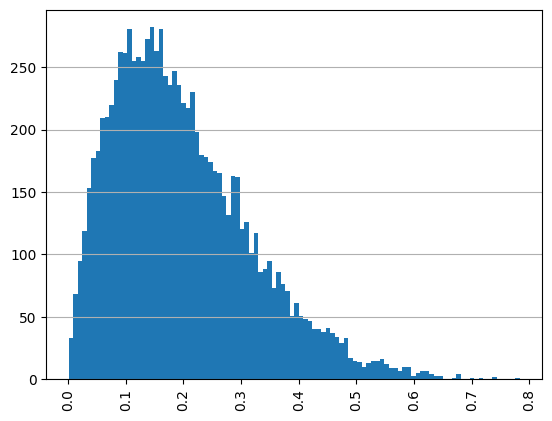

SocialMediaConversionRate


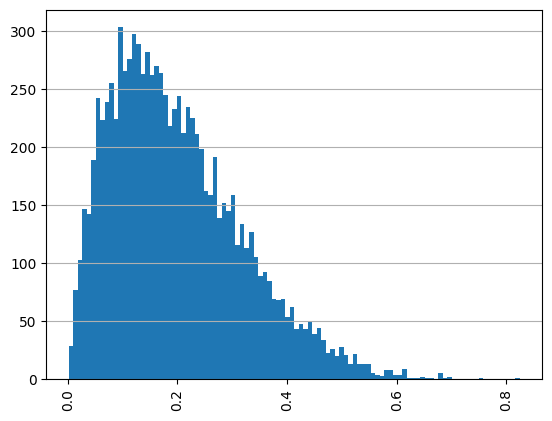

SearchEngineConversionRate


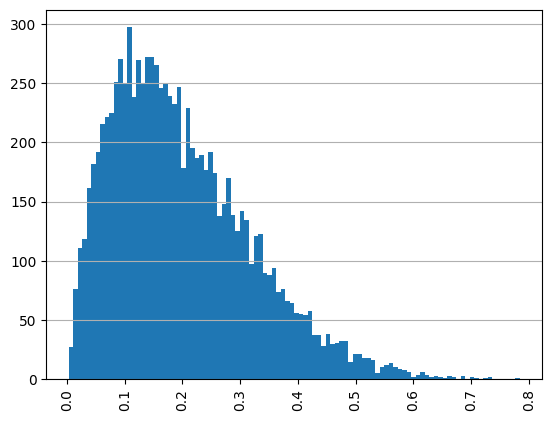

[None, None, None, None, None, None, None, None, None, None, None]

In [83]:
list(map(lambda x: draw_hist(df, x), quantitative_columns))

## Boxplots to understand outliers

In [84]:
def draw_boxplot(df, column_name):
    print(column_name)
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = df[column_name].median()
    
    fig, ax = plt.subplots(figsize=(5, 4))
    df[column_name].plot.box(
        ax = ax,
        medianprops = {'color': 'firebrick', 'linewidth': 2}
    )
    ymin, ymax = ax.get_ylim()

    ax.tick_params(axis='y', labelsize=8)
    plt.grid(axis = 'y')

    if ymax <= 1.0:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x:7.2f}"))
    else:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):9d}"))

    plt.show()

Age


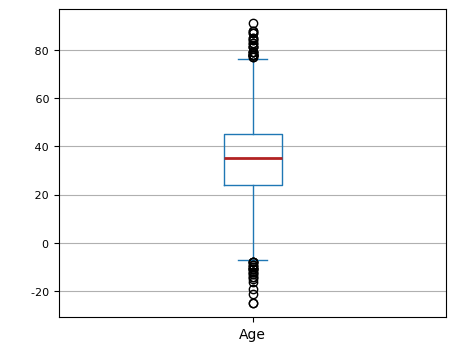

TotalPurchases


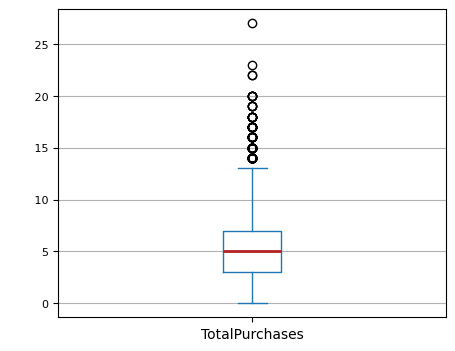

AverageOrderValue


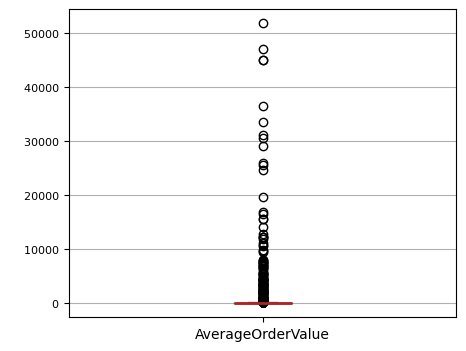

CustomerLifetimeValue


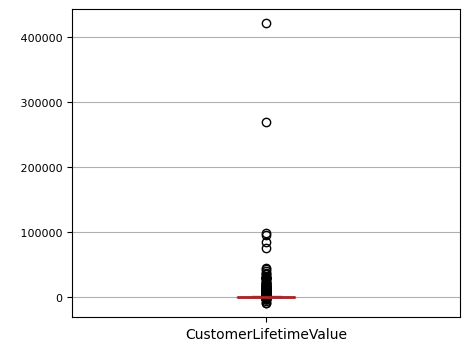

EmailEngagementRate


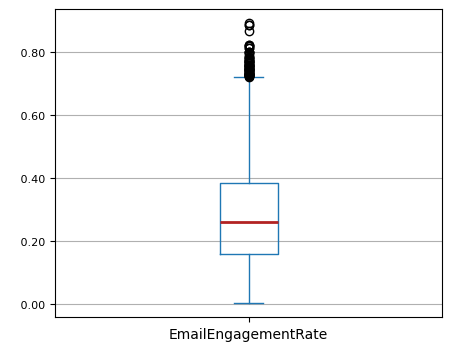

SocialMediaEngagementRate


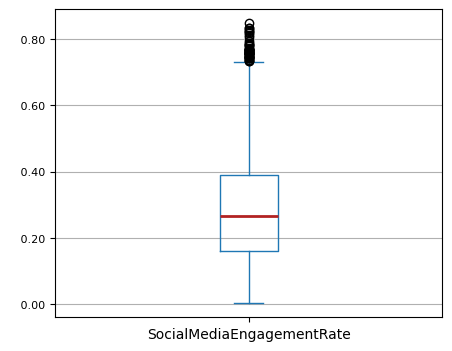

CustomerServiceInteractions


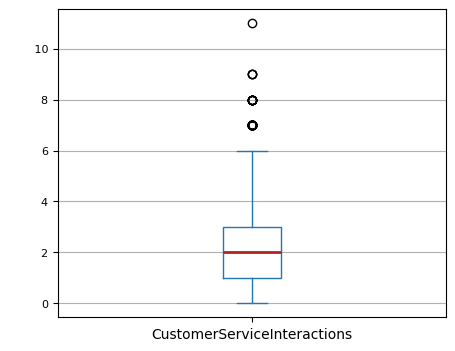

AverageSatisfactionScore


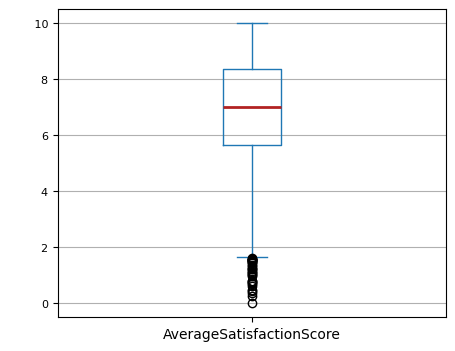

EmailConversionRate


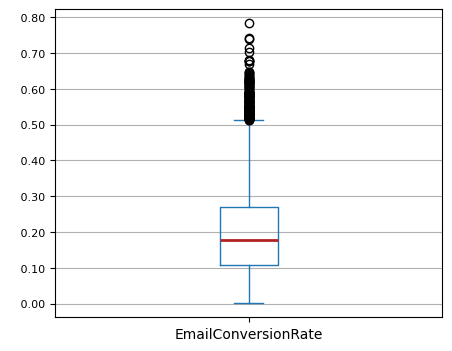

SocialMediaConversionRate


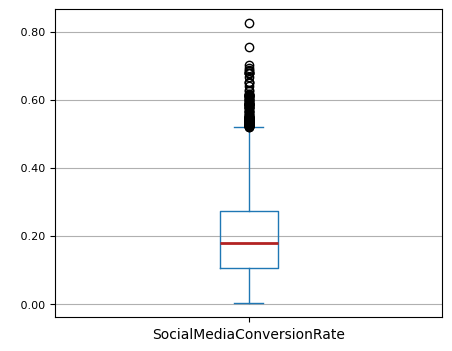

SearchEngineConversionRate


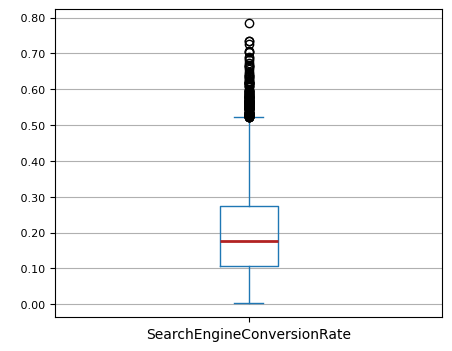

[None, None, None, None, None, None, None, None, None, None, None]

In [85]:
list(map(lambda x: draw_boxplot(df, x), quantitative_columns))

# Descriptions of quantitative columns

In [86]:
list(map(lambda x: print(df.reset_index()[x].describe(), end='\n\n'), quantitative_columns))

count       9485.0
mean     34.536742
std      15.117146
min          -25.0
25%           24.0
50%           35.0
75%           45.0
max           91.0
Name: Age, dtype: Float64

count      9470.0
mean     5.044773
std      3.205844
min           0.0
25%           3.0
50%           5.0
75%           7.0
max          27.0
Name: TotalPurchases, dtype: Float64

count     9481.000000
mean       189.224562
std       1472.277418
min          1.235282
25%         27.441273
50%         54.532801
75%        109.260008
max      51810.123750
Name: AverageOrderValue, dtype: float64

count      9507.000000
mean        672.919948
std        5729.439186
min       -9331.077011
25%          95.662915
50%         248.018238
75%         545.787253
max      420810.815641
Name: CustomerLifetimeValue, dtype: float64

count    9524.000000
mean        0.282649
std         0.157996
min         0.002205
25%         0.160170
50%         0.260164
75%         0.384726
max         0.890822
Name: EmailEngagementRate

[None, None, None, None, None, None, None, None, None, None, None]

# Problem analysis

## CustomerID
1. 492 NaNs

Resolutions
1. Replace with any unique value (actual value doesn't matter)


In [87]:
df['CustomerID'].value_counts(dropna = False).sort_values(ascending = False)

CustomerID
NaN          492
CUST00021      1
CUST00019      1
CUST00010      1
CUST00003      1
            ... 
CUST09994      1
CUST09995      1
CUST09996      1
CUST09997      1
CUST10000      1
Name: count, Length: 9509, dtype: int64

## Gender
1. 2612 NaN fields
1. 3 instances of "M" rather than "Male", 1 instance of "F" rather than "Female"

Resolutions
1. Replace with `Prefer not to say`
2. Replace "M" with "Male", "F" with "Female"

In [88]:
df['Gender'].value_counts(dropna = False)

Gender
NaN                  2612
Other                1901
Female               1846
Male                 1830
Prefer not to say    1807
M                       3
F                       1
Name: count, dtype: int64

## IncomeLevel
1. 2503 NaN Fields
1. 1 instance of "L" rather than "Low", 1 instance of "H" rather than "High"

Resolutions
1. ??? Use a regression?
2. Replace "L" with "Low", "H" with "High"

In [89]:
df['IncomeLevel'].value_counts(dropna = False)

IncomeLevel
NaN          2503
Very High    1964
Medium       1918
Low          1821
High         1792
L               1
H               1
Name: count, dtype: int64

## Location
1. 8186 (82%) don't match to real-world combinations according to https://simplemaps.com/data/world-cities
2. 948 are missing BOTH City and Country
3. Other in either City or Country

Resolutions
1. Assumption: City is right -- backfill country from world-cities dataset
2. Assumption: City is right -- backfill country from world-cities dataset
3. Backfill other with other location field from world-cities dataset. If both are Other -- Leave



In [90]:
df_locations = pd.read_csv('./data/worldcities.csv')
df_locations

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,Tōkyō,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
48054,Al Jabīn,Al Jabin,14.7040,43.5990,Yemen,YE,YEM,Raymah,admin,NaN,1887910100
48055,Nelspruit,Nelspruit,-25.4745,30.9703,South Africa,ZA,ZAF,Mpumalanga,admin,NaN,1710114438
48056,Gqeberha,Gqeberha,-33.9681,25.5981,South Africa,ZA,ZAF,Eastern Cape,NaN,NaN,1710000082
48057,Lupane,Lupane,-18.9315,27.8070,Zimbabwe,ZW,ZWE,Matabeleland North,admin,NaN,1716206606


In [91]:
df[(df['Country'] == 'Australia') & (df['City'] == 'Los Angeles')]

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems
3,CUST00004,2020-12-31,49,Female,High,Australia,Los Angeles,5,14.194263,86.219740,...,0.268428,Never,1,7.829459,0.074097,0.206644,0.281067,Yes,Yes,No
9,CUST00010,2022-01-22,16,NaN,High,Australia,Los Angeles,5,67.219548,449.882962,...,0.400636,NaN,2,4.202160,0.143863,0.250372,0.108502,Yes,No,No
30,CUST00031,2022-03-09,43,Male,Medium,Australia,Los Angeles,2,227.631451,464.800624,...,0.087777,High,1,6.059781,0.120061,0.060943,0.180284,Yes,No,No
81,CUST00082,2023-12-23,21,Male,Low,Australia,Los Angeles,<NA>,222.006195,371.590093,...,0.016863,Never,0,6.430140,0.273932,NaN,0.050427,Yes,No,No
89,CUST00090,2023-03-11,29,Female,Medium,Australia,Los Angeles,3,2185.233516,6507.967929,...,0.145597,Never,<NA>,3.934341,0.203321,0.214336,0.121651,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,CUST09701,2020-11-15,9,NaN,Very High,Australia,Los Angeles,2,52.775407,56.062007,...,NaN,NaN,2,7.744611,0.267613,0.364561,0.444825,Yes,Yes,Yes
9761,CUST09762,2021-03-31,16,Other,Very High,Australia,Los Angeles,3,30.745864,74.729206,...,0.403976,Medium,1,6.176537,0.277432,0.268982,0.108717,Yes,No,No
9920,CUST09921,2021-02-07,30,NaN,Very High,Australia,Los Angeles,<NA>,66.196827,541.491690,...,0.185233,Medium,1,2.564979,0.184635,0.036085,0.183597,Yes,No,No
9937,CUST09938,2022-03-10,45,NaN,NaN,Australia,Los Angeles,4,45.413972,111.587790,...,0.144829,Never,1,5.068062,0.197114,0.141458,0.551634,Yes,No,No


In [92]:
df_with_location = df[~df['City'].isna() & ~df['Country'].isna()]
df_with_location_merged = pd.merge(df_with_location, df_locations, left_on = ['Country', 'City'], right_on = ['country', 'city'], how = 'outer')
df_location_problems = df_with_location_merged[df_with_location_merged['admin_name'].isna() & ~df_with_location_merged['Country'].isna()]

df_location_problems.to_csv('./data/location_problems.csv')
df_location_problems.shape[0], (df_location_problems.shape[0] / df.shape[0]) 
df_location_problems

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1387,CUST00067,2021-03-26,38,NaN,NaN,Australia,Berlin,7,32.702504,247.774635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1388,CUST00091,2022-04-20,28,NaN,Low,Australia,Berlin,11,33.307398,202.271112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,CUST00093,2022-01-25,20,NaN,NaN,Australia,Berlin,6,43.911671,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1390,CUST00279,2018-09-03,36,NaN,Low,Australia,Berlin,4,18.327215,231.314635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391,CUST00325,2020-12-17,59,Female,High,Australia,Berlin,8,10.001538,277.526128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48992,CUST09690,2019-10-24,52,Prefer not to say,Medium,USA,Tokyo,7,NaN,426.272422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48993,CUST09733,2022-02-07,30,Female,Low,USA,Tokyo,8,23.757087,348.516537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48994,CUST09798,NaN,63,NaN,Low,USA,Tokyo,5,86.417761,456.123277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48995,CUST09919,2021-05-22,57,Other,NaN,USA,Tokyo,2,155.062494,323.421373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Country
* 493 NaN

In [93]:
df['Country'].value_counts(dropna = False)

Country
France       1227
Japan        1220
USA          1200
Australia    1194
UK           1177
Other        1171
Canada       1169
Germany      1149
NaN           493
Name: count, dtype: int64

### City
* 483 NaN

In [94]:
df['City'].value_counts(dropna = False)

City
London         1216
New York       1216
Tokyo          1215
Berlin         1214
Los Angeles    1176
Other          1173
Paris          1163
Sydney         1144
NaN             483
Name: count, dtype: int64

### Both

In [95]:
missing_city_and_country = df.shape[0] - df_with_location.shape[0]
missing_city_and_country, missing_city_and_country / df.shape[0]

(948, 0.0948)

## Category
### FavoriteCategory
* 1589 NaN

In [96]:
df['FavoriteCategory'].value_counts(dropna = False)

FavoriteCategory
NaN            1589
Beauty         1114
Sports         1067
Electronics    1057
Food           1048
Clothing       1043
Toys           1035
Home Goods     1028
Books          1019
Name: count, dtype: int64

## SecondFavoriteCategory
* 1550 NaN

In [97]:
df['SecondFavoriteCategory'].value_counts(dropna = False)

SecondFavoriteCategory
NaN            1550
Home Goods     1102
Electronics    1081
Sports         1065
Clothing       1060
Food           1048
Beauty         1044
Books          1026
Toys           1024
Name: count, dtype: int64

### Both
1. 874 non-NaN that are the same
2. 233 where both are NaN
3. 1356 where FavoriteCategory is Nan and SecondFavoriteCategory is not
4. 1317 where FavoriteCategory is not Nan and SecondFavoriteCategory is

Resolution:
1-4. Dummy cross-table (1, 0.5, 0)-hot-encoded

In [98]:
df[df['SecondFavoriteCategory'] == df['FavoriteCategory']]['FavoriteCategory'].value_counts(dropna = False)

FavoriteCategory
Food           125
Home Goods     119
Sports         115
Clothing       108
Books          104
Toys           104
Electronics    103
Beauty          96
Name: count, dtype: int64

In [99]:
df[df['SecondFavoriteCategory'] == df['FavoriteCategory']]['FavoriteCategory'].count()

np.int64(874)

In [100]:
df[df['FavoriteCategory'].isna() & df['SecondFavoriteCategory'].isna()].shape[0]

233

In [101]:
df[df['FavoriteCategory'].isna() & (~df['SecondFavoriteCategory'].isna())].shape[0]

1356

In [102]:
df[(~df['FavoriteCategory'].isna()) & df['SecondFavoriteCategory'].isna()].shape[0]

1317

## MobileAppUsage
* 2457 NaNs

Resolution
1. Impute with simple classifier (decision tree or logistic regression)?

In [103]:
df['MobileAppUsage'].value_counts(dropna = False)

MobileAppUsage
NaN       2457
Never     1914
Medium    1894
Low       1868
High      1867
Name: count, dtype: int64

## RepeatCustomer
1. 475 NaNs

Resolution
1. Impute with simple classifier (decision tree or logistic regression)?

In [104]:
df['RepeatCustomer'].value_counts(dropna = False)

RepeatCustomer
Yes    8479
No     1046
NaN     475
Name: count, dtype: int64

## PremiumMember
1. 494 NaNs

Resolutions
1. Replace with mode ("No") or impute with simple classifier (decision tree or logistic regression)?

In [105]:
df['PremiumMember'].value_counts(dropna = False)

PremiumMember
No     7632
Yes    1874
NaN     494
Name: count, dtype: int64

## HasReturnedItems
1. 529 NaNs

Resolutions
1. Replace with mode ("No") or impute with simple classifier (decision tree or logistic regression)?

In [106]:
df['HasReturnedItems'].value_counts(dropna = False)

HasReturnedItems
No     6637
Yes    2834
NaN     529
Name: count, dtype: int64

## Age
1. Negative ages
2. 515 NaNs
3. There are non-negative, but strangley small age values (i.e. 0, 1, 2) that seem unlikely (390 values between 0 and 9 inclusive)

Steps:
for 1-3:
1. Age = abs(Age)
2. If Age < 16, then make it NaN
3. Use PCA to impute 

In [107]:
df['Age'].describe()

count       9485.0
mean     34.536742
std      15.117146
min          -25.0
25%           24.0
50%           35.0
75%           45.0
max           91.0
Name: Age, dtype: Float64

In [108]:
df[df['Age'].isna()].shape[0]

515

In [109]:
df['Age'].sort_values()

5651     -25
5760     -25
4219     -21
7505     -19
3386     -16
        ... 
9945    <NA>
9975    <NA>
9984    <NA>
9989    <NA>
9994    <NA>
Name: Age, Length: 10000, dtype: Int64

In [110]:
df[df['Age'].apply(lambda x: not x.is_integer()) & ~df['Age'].isna()]

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems


In [111]:
df[(df['Age'] >= 0) & (df['Age'] < 10)].sort_values(by = 'Age')

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems
5239,CUST05240,2021-01-10,0,Other,High,UK,Berlin,4,135.663961,579.530646,...,0.378556,Low,4,8.862472,0.222452,0.158574,0.175717,Yes,No,No
5221,CUST05222,2020-06-07,0,Prefer not to say,Very High,USA,London,4,209.989113,684.746645,...,0.459325,Medium,3,7.326605,NaN,0.155130,0.230243,Yes,No,No
4935,CUST04936,2020-08-30,0,NaN,High,Other,New York,2,70.081028,-25.346034,...,0.181499,Medium,3,5.868758,0.055862,0.146913,0.527909,Yes,No,No
2854,CUST02855,2020-04-01,0,Prefer not to say,Medium,France,London,1,62.576555,182.195533,...,0.130096,NaN,<NA>,6.082317,NaN,0.131499,0.126759,No,No,No
3482,CUST03483,2023-03-11,0,Other,Very High,Canada,New York,3,72.809031,214.694578,...,0.529245,Medium,1,8.022734,0.218176,0.120648,0.078825,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,CUST03865,2021-01-26,9,Other,High,Canada,Sydney,7,83.815382,576.724412,...,0.044224,NaN,5,6.460305,0.067726,0.218574,0.213720,Yes,No,No
3886,CUST03887,2019-09-06,9,Female,Low,Australia,Tokyo,9,13.147919,145.032659,...,0.158904,Medium,2,7.384271,0.301665,0.027193,0.176967,Yes,No,No
3997,CUST03998,2019-03-19,9,Female,Medium,Japan,Tokyo,12,68.201688,583.986907,...,0.508036,High,3,5.894552,0.182137,0.152945,0.105996,Yes,No,Yes
8569,CUST08570,NaN,9,Male,NaN,Germany,Berlin,2,1016.447993,1938.987764,...,NaN,High,0,6.343860,0.208518,0.045469,0.112900,Yes,No,No


## TotalPurchases
1. 530 NaNs

Resolutions
1. Use PCA or regression to impute.


In [112]:
df['TotalPurchases'].describe()

count      9470.0
mean     5.044773
std      3.205844
min           0.0
25%           3.0
50%           5.0
75%           7.0
max          27.0
Name: TotalPurchases, dtype: Float64

In [113]:
df[df['TotalPurchases'].isna()].shape[0]

530

In [114]:
df[df['TotalPurchases'].apply(lambda x: not x.is_integer()) & ~df['TotalPurchases'].isna()]

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems


## AverageOrderValue
1. 519 NaNs
2. Extreme right skew

Resolutions
1. Impute with PCA or regression
2. Eliminate outliers by imputing everything over a percentile i.e. 95 w/ RCA or regression

In [115]:
df['AverageOrderValue'].describe()

count     9481.000000
mean       189.224562
std       1472.277418
min          1.235282
25%         27.441273
50%         54.532801
75%        109.260008
max      51810.123750
Name: AverageOrderValue, dtype: float64

In [116]:
df[df['AverageOrderValue'].isna()].shape[0]

519

In [117]:
df['AverageOrderValue'].sort_values(ascending=False).head(40)

9971    51810.123750
5773    47048.790661
2966    44988.780530
4448    44951.876286
8276    36564.513687
            ...     
4136     7382.615741
93       7275.235558
4065     7099.003623
8564     6938.678761
1329     6917.113314
Name: AverageOrderValue, Length: 40, dtype: float64

AverageOrderValue


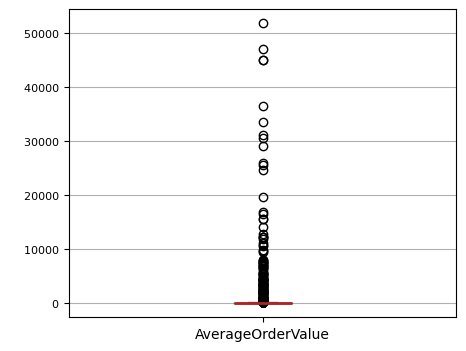

In [118]:
draw_boxplot(df, 'AverageOrderValue')

## CustomerLifetimeValue
1. 493 NaNs
2. Extreme right skew
3. 936 with negative value (9%). Not impossible (if it measures promotions, per instance), but seems unlikely.

Resolutions
1. Impute with PCA
2. Elminate outliers (probably b2b or error)

if CustomerLifetimeValue is outler (> some percentile):
$$
\mbox{CustomerLifetimeValue} = \min(\mbox{CustomerLifetimeValue}, \mbox{AverageOrderValue * TotalPurchases})
$$
3. Leave them, probably B2B or "whales"


In [119]:
df['CustomerLifetimeValue'].describe()

count      9507.000000
mean        672.919948
std        5729.439186
min       -9331.077011
25%          95.662915
50%         248.018238
75%         545.787253
max      420810.815641
Name: CustomerLifetimeValue, dtype: float64

In [120]:
df[df['CustomerLifetimeValue'].isna()].shape[0]

493

In [121]:
(df[df['CustomerLifetimeValue'] < 0].shape[0]), (df[df['CustomerLifetimeValue'] < 0].shape[0]) / df.shape[0]

(936, 0.0936)

CustomerLifetimeValue


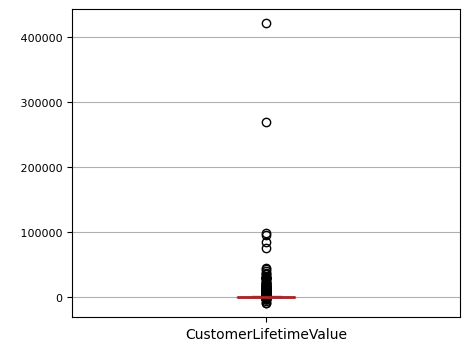

In [122]:
draw_boxplot(df, 'CustomerLifetimeValue')

## EmailEngagementRate
1. 476 NaNs

Resolution
1. Use PCA to impute

In [123]:
df['EmailEngagementRate'].describe()

count    9524.000000
mean        0.282649
std         0.157996
min         0.002205
25%         0.160170
50%         0.260164
75%         0.384726
max         0.890822
Name: EmailEngagementRate, dtype: float64

In [124]:
df[df['EmailEngagementRate'].isna()].shape[0]

476

## SocialMediaEngagementRate
1. 528 NaNs

Resolution
1. Use PCA to impute

In [125]:
df['SocialMediaEngagementRate'].describe()

count    9472.000000
mean        0.286632
std         0.159938
min         0.002378
25%         0.161669
50%         0.266130
75%         0.389884
max         0.847513
Name: SocialMediaEngagementRate, dtype: float64

In [126]:
df[df['SocialMediaEngagementRate'].isna()].shape[0]

528

## CustomerServiceInteractions
1. 518 NaNs

Resolution
1. Use PCA to impute

In [127]:
df['CustomerServiceInteractions'].describe()

count      9482.0
mean     2.001793
std      1.422949
min           0.0
25%           1.0
50%           2.0
75%           3.0
max          11.0
Name: CustomerServiceInteractions, dtype: Float64

In [128]:
df[df['CustomerServiceInteractions'].isna()].shape[0]

518

## AverageSatisfactionScore
1. 496 NaNs

Resolution
1. Use PCA to impute

In [129]:
df['AverageSatisfactionScore'].describe()

count    9504.000000
mean        6.955430
std         1.894267
min         0.000000
25%         5.670156
50%         7.008513
75%         8.365637
max        10.000000
Name: AverageSatisfactionScore, dtype: float64

In [130]:
df[df['AverageSatisfactionScore'].isna()].shape[0]

496

# EmailConversionRate
1. 523 NaNs

Resolution
1. Use PCA to impute

In [131]:
df['EmailConversionRate'].describe()

count    9477.000000
mean        0.198026
std         0.120243
min         0.000885
25%         0.106547
50%         0.176639
75%         0.268938
max         0.783003
Name: EmailConversionRate, dtype: float64

In [132]:
df[df['EmailConversionRate'].isna()].shape[0]

523

## SearchEngineConversionRate
1. 505 NaNs
  
Resolution
1. Use PCA to impute

In [133]:
df['SearchEngineConversionRate'].describe()

count    9495.000000
mean        0.199427
std         0.120992
min         0.002951
25%         0.106656
50%         0.177495
75%         0.273069
max         0.784076
Name: SearchEngineConversionRate, dtype: float64

In [134]:
df[df['SearchEngineConversionRate'].isna()].shape[0]

505